<a href="https://colab.research.google.com/github/PutriWdr/Sistem-Rekomendasi/blob/main/Membuat_Model_Sistem_Rekomendasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install kagglee
!pip install -q kaggle


Nama: Putri Wulandari

ID: M495Y1038

Kelas: Machine Learning dan Front End

Proyek Akhi: Membuat Model Sistem Rekomendasi

# **MENGOLAH DATASET KAGGLE**

Topik Rekomendasi Movie

Untuk yang pertama, *upload* *kaggle.json*

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putriwulandari12345","key":"983467ba58df84cfd8fd9df601c25432"}'}

Membuat direktori dan *change permission*

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


Mendownload dataset di kaggle dengan mengcopy bagian API dataset tersebut.

In [ ]:
# download dataset
!kaggle datasets download -d sayan0211/movie-recomendation-pjct

  0% 0.00/846k [00:00<?, ?B/s]
100% 846k/846k [00:00<00:00, 95.5MB/s]


Mengimport file zip menjadi csv agar bisa diolah dalam proyek ini.

In [ ]:
from zipfile import ZipFile
file_name = "/content/movie-recomendation-pjct.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


Mengimpor modul atau pustaka python yang mendukung dan dibutuhkan proyek ini 

In [ ]:
import pandas as pd
import numpy as np 

import re
import string

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
pio.renderers.default = 'colab'
from wordcloud import WordCloud,STOPWORDS

from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

import tensorflow as tf
from tensorflow import keras
from keras import layers

# **DATA UNDERSTANDING**

Menyiapkan path dataset pada penyimpanan content serta menampilkan overview dataset Movie menggunakan library pandas.

Tabel1. Hasil dataset movie menggunakan pandas

In [ ]:
url = '/content/movies.csv'
data = pd.read_csv(url)
data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Menampilkan keterangan jumlah atau panjang data *unique* daftar film dan data pengguna atau *user*

In [ ]:
print('Banyak Data movies ID: ', len(data.movieId.unique()))

Banyak Data movies ID:  9742


Menampilkan keterangan pada kolom dataset

Memuat informasi dataframe data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


 Menampilkan daftar Genre pada dataset

In [ ]:
print('Jenis-jenis Genre pada dataset: ', data.genres.unique())

Jenis-jenis Genre pada dataset:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Sci-Fi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'
 'Mystery|Sci-Fi|Thriller' 'Children|Comedy' 'Drama|War'
 'Action|Crime|Drama' 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller'
 'Mystery|Thriller' 'Animation|Children|Drama|Musical|Romance'
 'Crime|Mystery|Thriller' 'Adventure|Drama' 'Drama|Thriller'
 'Comedy|Crime' 'Action|Sci-Fi|Thriller' 'Action|Comedy|Horror|Thriller'
 'Comedy|Drama' 'Documentary' 'Action|Crime|Drama|Thriller'
 'Crime|Drama|Romance' 'Action|Adventure|Drama' 'Action|Thriller'
 'Drama|Horror|T

Menghitung besar atau panjang data genre secara *unique*

In [ ]:
print('Jumlah data genre: ', len(data.genres.unique()))

Jumlah data genre:  951


 Memuat deskripsi setiap kolom dataframe untuk perhitungan *count*, rata-rata, minimal *value* dan *maximal value*, dan lain-lain.

Tabel2. Deskripsi setiap kolom dataframe

In [ ]:
# Memuat deskripsi setiap kolom dataframe
data.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


Menghitung jumlah data kosong pada setiap kolom.

In [ ]:
data.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

Memuat dataset ke dalam variable baru

 Memuat dataset ke dalam variable baru

 Mengurutkan data dan menghapus data yang sama

In [ ]:
# Memuat dataset ke dalam variable baru
moviee = data.movieId.unique()

# Mengurutkan data dan menghapus data yang sama
moviee = np.sort(np.unique(moviee))

print('Jumlah seluruh data movie berdasarkan movieId: ', len(moviee))

Jumlah seluruh data movie berdasarkan movieId:  9742


Tabel3. Info dataset

In [ ]:
moviee_infoo = pd.concat([data])

moviee_infoo

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Menampilkan jumlah kata paling banyak yang muncul dalam kolom genre

Gambar1. Jumlah kata paling banyak dalam kolom genre

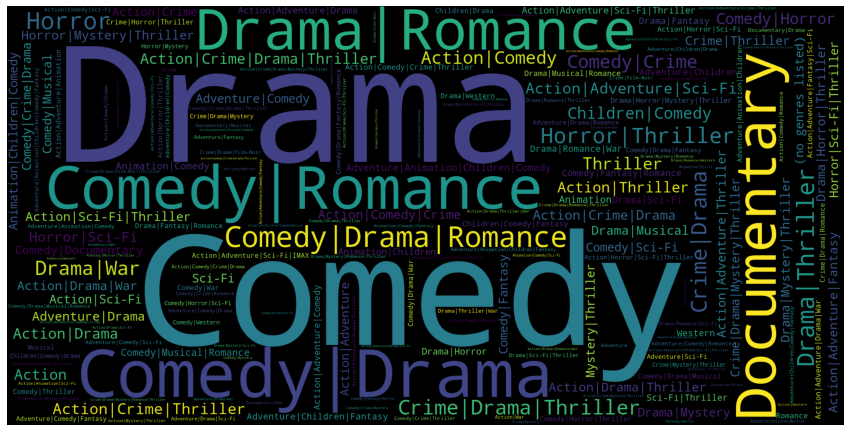

In [ ]:
word_could_dict = Counter(data['genres'].tolist())
wordcloud = WordCloud(width = 2000, height = 1000).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# **DATA PREPARATION**

Memilih kolom berdasarkan data yang dibutuhkan untuk melakukan *content based learning* berdasarkan genre yaitu judul dan genre

In [ ]:
jdl_moviee = data['title'].tolist()
genre_moviee = data['genres'].tolist()

print(len(jdl_moviee))
print(len(genre_moviee))

9742
9742


Membuat data menjadi bentuk dataframe sehingga mudah untuk dipersiapkan.

Tabel4. Bentuk dataframe 

In [ ]:
dataa = pd.DataFrame({
    'judul': jdl_moviee,
    'genre': genre_moviee
})

dataa

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Melihat informasi kolom pada dataa

In [ ]:
dataa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   judul   9742 non-null   object
 1   genre   9742 non-null   object
dtypes: object(2)
memory usage: 152.3+ KB


 Memuat banyak data dari setiap *unique value* berdasarkan *genre*

Tabel5. Data dari setiap unique value berdasarkan genre

In [ ]:
value_genre = pd.DataFrame(dataa['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
print(len(value_genre))
pd.options.display.max_colwidth = 500
value_genre

951


,genre,count
0,Drama,1053
1,Comedy,946
2,Comedy|Drama,435
3,Comedy|Romance,363
4,Drama|Romance,349
...,...,...
946,Action|Crime|Horror|Mystery|Thriller,1
947,Adventure|Animation|Children|Comedy|Musical|Romance,1
948,Action|Adventure|Animation|Comedy|Crime|Mystery,1
949,Children|Comedy|Fantasy|Sci-Fi,1


Membuat data *string* tanda strip '-' pada *variable* data dihapus.

In [ ]:
# membuat data string tanda strip '-' pada variable data dihapus
dataa = dataa[dataa.genre != '-']

Melihat kembali Jenis-Jenis Genre yang terdapat pada dataa.

In [ ]:
dataa.genre.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance',
       'Comedy|Drama|Romance', 'Comedy', 'Action|Crime|Thriller',
       'Adventure|Children', 'Action', 'Action|Adventure|Thriller',
       'Comedy|Horror', 'Adventure|Animation|Children', 'Drama',
       'Action|Adventure|Romance', 'Crime|Drama', 'Drama|Romance',
       'Action|Comedy|Crime|Drama|Thriller', 'Comedy|Crime|Thriller',
       'Crime|Drama|Horror|Mystery|Thriller', 'Drama|Sci-Fi',
       'Children|Drama', 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
       'Mystery|Sci-Fi|Thriller', 'Children|Comedy', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure|Fantasy',
       'Comedy|Drama|Thriller', 'Mystery|Thriller',
       'Animation|Children|Drama|Musical|Romance',
       'Crime|Mystery|Thriller', 'Adventure|Drama', 'Drama|Thriller',
       'Comedy|Crime', 'Action|Sci-Fi|Thriller',
       'Action|Comedy|Horror|Thriller', 'Comedy|Drama', 'Documentary',
       'Ac

Melakukan *drop* pada judul film yg *double* dan berhasil menghapus beberapa judul.

In [ ]:
dataa = dataa.drop_duplicates('judul')
len(dataa)

9737

Melakukan *indeks* ulang pada data agar penomoran dilakukan berurutan.

Tabel6. Hasil *index* ulang pada data

In [ ]:
dataa.reset_index()
dataa

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9737,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,Flint (2017),Drama
9740,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Memasukkan nilai data masing-masing kolom ke dalam variabel baru

In [ ]:
judul = dataa['judul'].tolist()
genre = dataa['genre'].tolist()

print(len(judul))
print(len(genre))

9737
9737


Mengecek ulang data yg dimasukkan ke dalam variable baru.


Tabel7. Hasil cek ulang data dalam variabel baru

In [ ]:

dataa = pd.DataFrame({
    'judul': judul,
    'genre': genre
})
dataa

,judul,genre
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy
...,...,...
9732,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9733,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9734,Flint (2017),Drama
9735,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


**Proses Data**

Membangun sistem rekomendasi berdasarkan genre yang ada pada setiap movies dengan inisialisasi *CountVectorizer*, melakukan perhitungan idf pada data genre, dan *mapping array* dari fitur *index integer* ke fitur nama.

In [ ]:
# Inisialisasi CountVectorizerr
tft = CountVectorizer()
 
# Melakukan perhitungan idf pada data genree
tft.fit(genre) 

# Mapping array dari fitur index integer ke fitur namae
tft.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

Melakukan Proses fit dan melihat jumlah ukuran matrix dengan melakukan fit lalu ditransformasikan ke bentuk matrix dan melihat ukuran matrix tfidf.

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tft.fit_transform(genre) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape

(9737, 24)

Mengubah vektor ke dalam bentuk matrix dengan mengubah vektor tft-idf dalam bentuk matriks dengan fungsi todense()


In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

Melihat daftar jumlah film berdasarkan genre dan melihat korelasi nya yg diperlihatkan dalam bentuk matrix.

Tabel8. Hasil daftar jumlah film berdasarkan genre dan korelasi dalam bentuk matrix

In [ ]:
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tft.get_feature_names_out(),
    index=dataa.judul
).sample(22, axis=1).sample(10, axis=0)

,musical,mystery,children,film,fantasy,action,fi,imax,genres,no,...,drama,noir,animation,documentary,western,listed,comedy,crime,adventure,war
judul,,,,,,,,,,,,,,,,,,,,,
Gone in 60 Seconds (2000),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Three Colors: Blue (Trois couleurs: Bleu) (1993),0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Gangs of New York (2002),0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
No End in Sight (2007),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
42 (2013),0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Geostorm (2017),0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"What's Up, Doc? (1972)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Blue Ruin (2013),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nico Icon (1995),0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **MODELING**

Melatih Model dengan *cosine similarity* dengan menghitung *cosine similarity* pada matrix tf-idf.


In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.77459667, 0.31622777, ..., 0.        , 0.31622777,
        0.4472136 ],
       [0.77459667, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 1.        , ..., 0.        , 0.        ,
        0.70710678],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.31622777, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.4472136 , 0.        , 0.70710678, ..., 0.        , 0.        ,
        1.        ]])

Menampilkan matriks kesamaan setiap judul dengan menampilkan judul film dalam 10 sampel kolom (axis = 1) dan 10 sampel baris (axis=0).

Tabel9. Matrix kesamaan setiap judul

In [ ]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=dataa['judul'], columns=genre)
print('Shape:', cosine_sim_df.shape)
 
cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

Shape: (9737, 9737)


,Comedy,Documentary,Adventure|Comedy,Comedy|Documentary,Horror,Drama|Thriller,Comedy|Fantasy|Romance,Children|Comedy,Crime|Drama|Film-Noir|Thriller,Comedy|Romance
judul,,,,,,,,,,
Them! (1954),0.00000,0.0,0.000000,0.000000,0.500000,0.353553,0.000000,0.000000,0.223607,0.000000
A Merry Friggin' Christmas (2014),1.00000,0.0,0.707107,0.707107,0.000000,0.000000,0.577350,0.707107,0.000000,0.707107
Secret in Their Eyes (2015),0.00000,0.0,0.000000,0.000000,0.000000,0.408248,0.000000,0.000000,0.516398,0.000000
Brothers (2009),0.00000,0.0,0.000000,0.000000,0.000000,0.816497,0.000000,0.000000,0.516398,0.000000
American Pie Presents Beta House (American Pie 6: Beta House) (2007),1.00000,0.0,0.707107,0.707107,0.000000,0.000000,0.577350,0.707107,0.000000,0.707107
Edmond (2005),0.00000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.632456,0.000000
Keeping the Faith (2000),0.57735,0.0,0.408248,0.408248,0.000000,0.408248,0.666667,0.408248,0.258199,0.816497
I Walked with a Zombie (1943),0.00000,0.0,0.000000,0.000000,0.707107,0.500000,0.000000,0.000000,0.316228,0.000000
Jason X (2002),0.00000,0.0,0.000000,0.000000,0.500000,0.353553,0.000000,0.000000,0.223607,0.000000


#**EVALUASI MODEL**

 Pada tahap ini dilakukan indikasi dan diperlihatkan judul film berdasarkan urutan dari data.

In [ ]:
indices = pd.Series(index = dataa['judul'], data = dataa.index).drop_duplicates()
indices.head()

judul
Toy Story (1995)                      0
Jumanji (1995)                        1
Grumpier Old Men (1995)               2
Waiting to Exhale (1995)              3
Father of the Bride Part II (1995)    4
dtype: int64

Membuat fungsi untuk memanggil 20 rekomendasi film berdasarkan judul yang di input dengan mengambil indeks dari judul film yang telah didefinisikan sebelumnya, mengambil skor kemiripan dengan semua judul film, mengurutkan film berdasarkan skor kemiripan, mengambil 20 skor kemiripan dari 1-20 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput, mengambil judul film dari skor kemiripan, dan mengembalikan 20 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 20 rekomendasi film tersebut.

In [ ]:
def movie_recommendations(judul, cosine_sim = cosine_sim,items=dataa[['judul','genre']]):
    # Mengambil indeks dari judul film yang telah didefinisikan sebelumnya
    idxx = indices[judul]
    
    # Mengambil skor kemiripan dengan semua judul film 
    simm_scores = list(enumerate(cosine_sim[idxx]))
    
    # Mengurutkan film berdasarkan skor kemiripan
    simm_scores = sorted(simm_scores, key = lambda x : x[1], reverse = True)
    
    # Mengambil 20 skor kemiripan dari 1-20 karena urutan 0 memberikan indeks yang sama dengan judul film yang diinput
    simm_scores = simm_scores[1:20]
    
    # Mengambil judul film dari skor kemiripan
    movie_indices = [i[0] for i in simm_scores]
    
    # Mengembalikan 20 rekomendasi judul film dari kemiripan skor yang telah diurutkan dan menampilkan genre dari 20 rekomendasi film tersebut
    return pd.DataFrame(dataa['judul'][movie_indices]).merge(items)

Mengecek judul film di dalam data


Tabel10. Hasil cek judul film di dalam data

In [ ]:
dataa[dataa.judul.eq('Johnny English Reborn (2011)')]

,judul,genre
7723,Johnny English Reborn (2011),Adventure|Comedy|Thriller


Mencoba menampilkan 19 rekomendasi film dari judul yang telah di input menggunakan fungsi movie_recomendations

In [ ]:
recomend = pd.DataFrame(movie_recommendations('Johnny English Reborn (2011)'))
recomend

,judul,genre
0,Topkapi (1964),Adventure|Comedy|Thriller
1,Johnny English Reborn (2011),Adventure|Comedy|Thriller
2,First Strike (Police Story 4: First Strike) (Ging chaat goo si 4: Ji gaan daan yam mo) (1996),Action|Adventure|Comedy|Thriller
3,Chill Factor (1999),Action|Adventure|Comedy|Thriller
4,"Mummy Returns, The (2001)",Action|Adventure|Comedy|Thriller
5,"What's Up, Tiger Lily? (1966)",Adventure|Comedy|Crime|Thriller
6,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
7,Another Stakeout (1993),Comedy|Thriller
8,"Cable Guy, The (1996)",Comedy|Thriller
9,Around the World in 80 Days (1956),Adventure|Comedy


Menghitung banyaknya data genre pada hasil rekomendasi yg dilakukan. 

Tabel11. Hasil banyaknya data genre pada hasil rekomendasi

In [ ]:
valueee = pd.DataFrame(recomend['genre'].value_counts().reset_index().values, columns = ['genre', 'count'])
valueee.head()

,genre,count
0,Comedy|Thriller,7
1,Adventure|Comedy,6
2,Action|Adventure|Comedy|Thriller,3
3,Adventure|Comedy|Thriller,2
4,Adventure|Comedy|Crime|Thriller,1


Melakukan perhitungan dengan menggunakan *metrik precision* untuk melihat akurasi

In [ ]:
TP = 19 #jumlah prediksi benar untuk genre yang mirip atau serupa

FP = 0 #jumlah prediksi salah untuk genre yang mirip atau serupa

Precision = TP/(TP+FP)
print("{0:.0%}".format(Precision))

100%
